<a href="https://colab.research.google.com/github/kaayyt/Netflix-Data-Analysis-and-Basic-ML/blob/main/Netflix_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import the required modules
from google.colab import files
import pandas as pd

# Prompt user to upload a file
uploaded = files.upload()

# Load the CSV into a Pandas DataFrame
for filename in uploaded.keys():
    df = pd.read_csv(filename)
    print(f'{filename} uploaded successfully!')

# Display the first few rows of the DataFrame
df.head()


Saving netflix1.csv to netflix1.csv
netflix1.csv uploaded successfully!


,show_id,type,title,director,country,date_added,release_year,rating,duration,listed_in
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,United States,9/25/2021,2020,PG-13,90 min,Documentaries
1,s3,TV Show,Ganglands,Julien Leclercq,France,9/24/2021,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act..."
2,s6,TV Show,Midnight Mass,Mike Flanagan,United States,9/24/2021,2021,TV-MA,1 Season,"TV Dramas, TV Horror, TV Mysteries"
3,s14,Movie,Confessions of an Invisible Girl,Bruno Garotti,Brazil,9/22/2021,2021,TV-PG,91 min,"Children & Family Movies, Comedies"
4,s8,Movie,Sankofa,Haile Gerima,United States,9/24/2021,1993,TV-MA,125 min,"Dramas, Independent Movies, International Movies"


In [ ]:
# Step 2: Data Cleaning

# Check for missing values
print("Missing values in each column:\n", df.isnull().sum())

# Drop duplicates
df.drop_duplicates(inplace=True)
print("\nDuplicates dropped (if any).")

# Check if the required columns exist in the DataFrame
required_columns = ['director', 'cast', 'country']
for column in required_columns:
    if column not in df.columns:
        print(f"Warning: Column '{column}' not found in DataFrame. Skipping this column for dropna.")
        required_columns.remove(column)  # Remove the missing column from the list

# Drop rows with missing critical information in specified columns (if they exist)
if required_columns:  # Proceed only if there are valid columns left
    df.dropna(subset=required_columns, inplace=True)
    print(f"\nRows with missing critical information ({', '.join(required_columns)}) dropped.")

# Convert 'date_added' to datetime
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')
print("\n'date_added' column converted to datetime format.")

# Show data types to confirm changes
print("\nData types after correction:\n", df.dtypes)

Missing values in each column:
 show_id         0
type            0
title           0
director        0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
dtype: int64

Duplicates dropped (if any).

Rows with missing critical information (director, country) dropped.

'date_added' column converted to datetime format.

Data types after correction:
 show_id                 object
type                    object
title                   object
director                object
country                 object
date_added      datetime64[ns]
release_year             int64
rating                  object
duration                object
listed_in               object
dtype: object


<ipython-input-5-f1aaf8304af1>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')


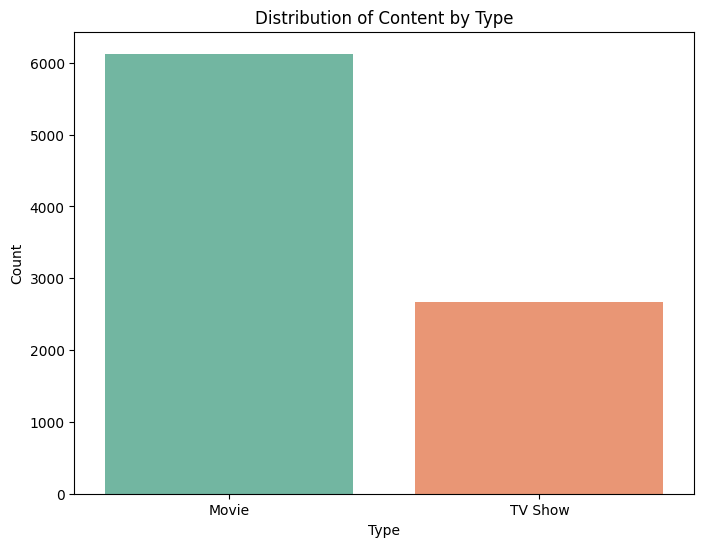

In [ ]:
# Step 3: Exploratory Data Analysis (EDA)
# Content Type Distribution (Movies vs. TV Shows)

# Import the necessary libraries
import matplotlib.pyplot as plt  # Import matplotlib for plotting
import seaborn as sns            # Import seaborn for enhanced visualizations


type_counts = df['type'].value_counts()

# Plot the distribution
plt.figure(figsize=(8, 6))
sns.barplot(x=type_counts.index, y=type_counts.values, palette='Set2')
plt.title('Distribution of Content by Type')
plt.xlabel('Type')
plt.ylabel('Count')
plt.show()

<ipython-input-6-4e3d8a3eccf4>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')


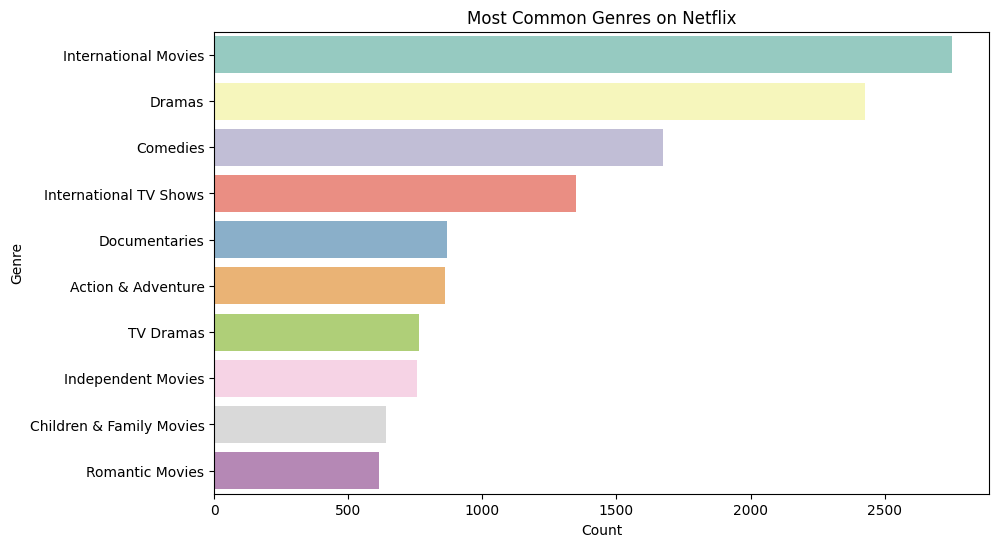

In [ ]:
# Extract Genres
# Split the 'listed_in' column by ',' and create a list of all genres
df['genres'] = df['listed_in'].apply(lambda x: x.split(', ') if pd.notnull(x) else [])
all_genres = sum(df['genres'], [])

# Count the occurrences of each genre and get the top 10 most common genres
genre_counts = pd.Series(all_genres).value_counts().head(10)

# Step:Plot the Most Common Genres
plt.figure(figsize=(10, 6))
sns.barplot(x=genre_counts.values, y=genre_counts.index, palette='Set3')
plt.title('Most Common Genres on Netflix')
plt.xlabel('Count')
plt.ylabel('Genre')
plt.show()

<ipython-input-17-78085a5cbd02>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='year_added', data=df, palette='coolwarm')


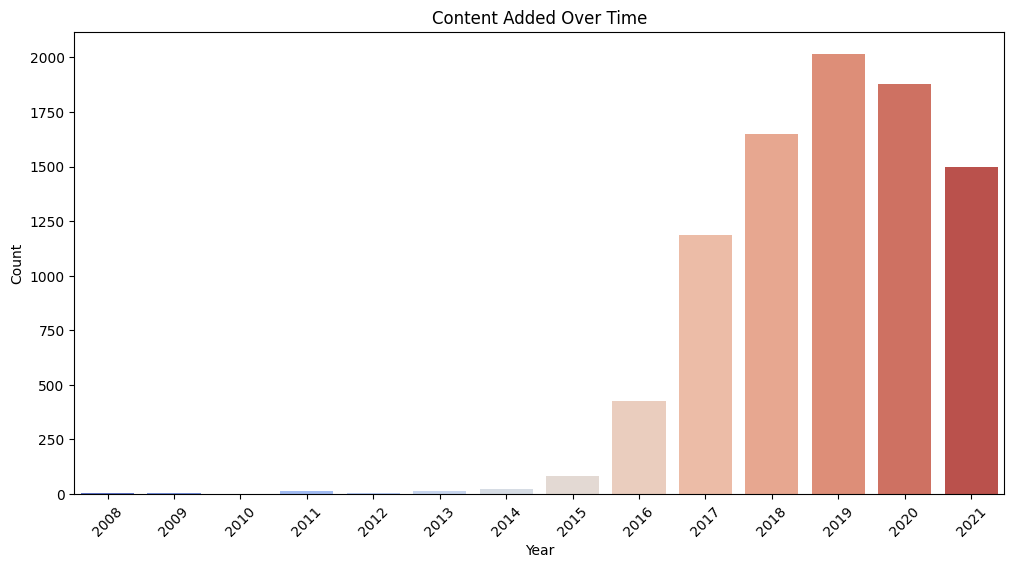

In [ ]:

import matplotlib.pyplot as plt
# Extract year and month from 'date_added'
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

#Plot Content Added Over the Years
plt.figure(figsize=(12, 6))
sns.countplot(x='year_added', data=df, palette='coolwarm')
plt.title('Content Added Over Time')
plt.xlabel('Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


<ipython-input-8-9f6cc4a29665>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')


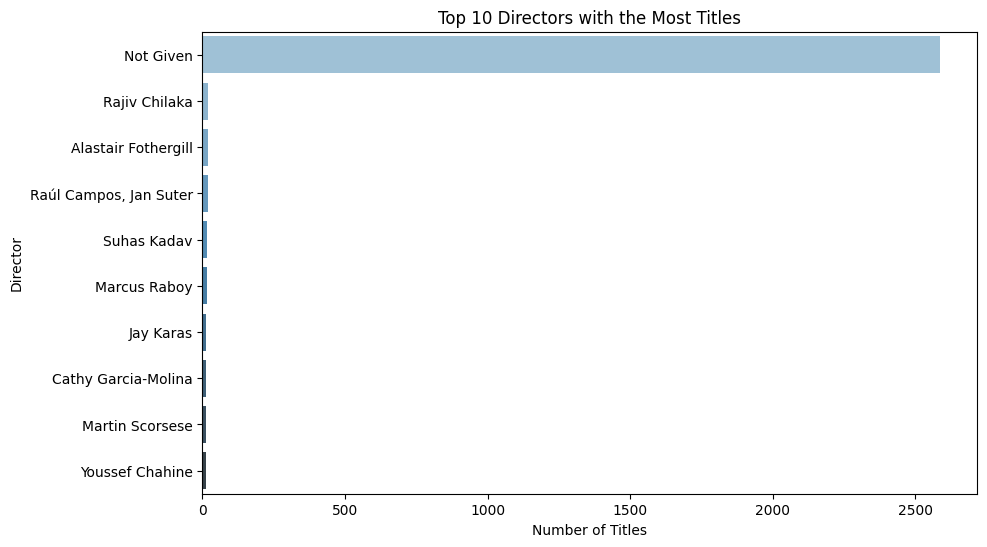

In [ ]:
# Count Titles by Director
# Count the number of titles by director and get the top 10
top_directors = df['director'].value_counts().head(10)

#Plot Top Directors
plt.figure(figsize=(10, 6))
sns.barplot(x=top_directors.values, y=top_directors.index, palette='Blues_d')
plt.title('Top 10 Directors with the Most Titles')
plt.xlabel('Number of Titles')
plt.ylabel('Director')
plt.show()


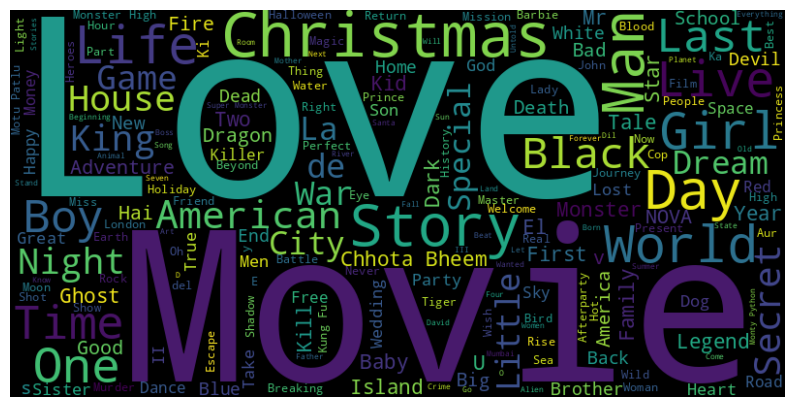

In [ ]:
from wordcloud import WordCloud  # Import WordCloud
#Generate Word Cloud for Movie Titles
# Filter only movie titles
movie_titles = df[df['type'] == 'Movie']['title']

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(' '.join(movie_titles))

# Plot Word Cloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

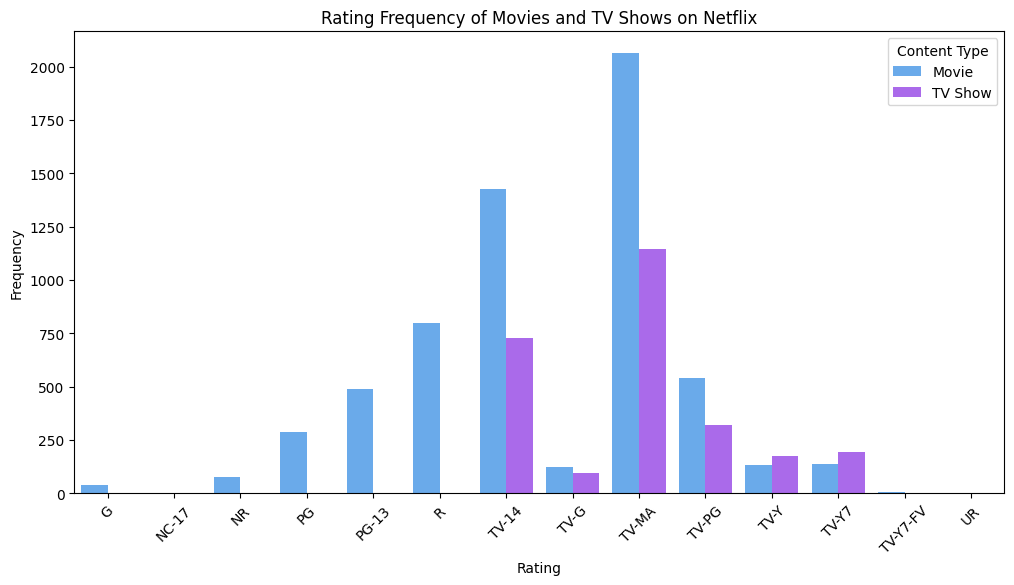

In [ ]:
#Filter and Count Ratings for Movies and TV Shows
# Count the frequency of each rating for movies and TV shows separately
rating_counts = df.groupby(['type', 'rating']).size().reset_index(name='count')

# Plot Rating Frequency for Movies and TV Shows
plt.figure(figsize=(12, 6))
sns.barplot(x='rating', y='count', hue='type', data=rating_counts, palette='cool')
plt.title('Rating Frequency of Movies and TV Shows on Netflix')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.show()

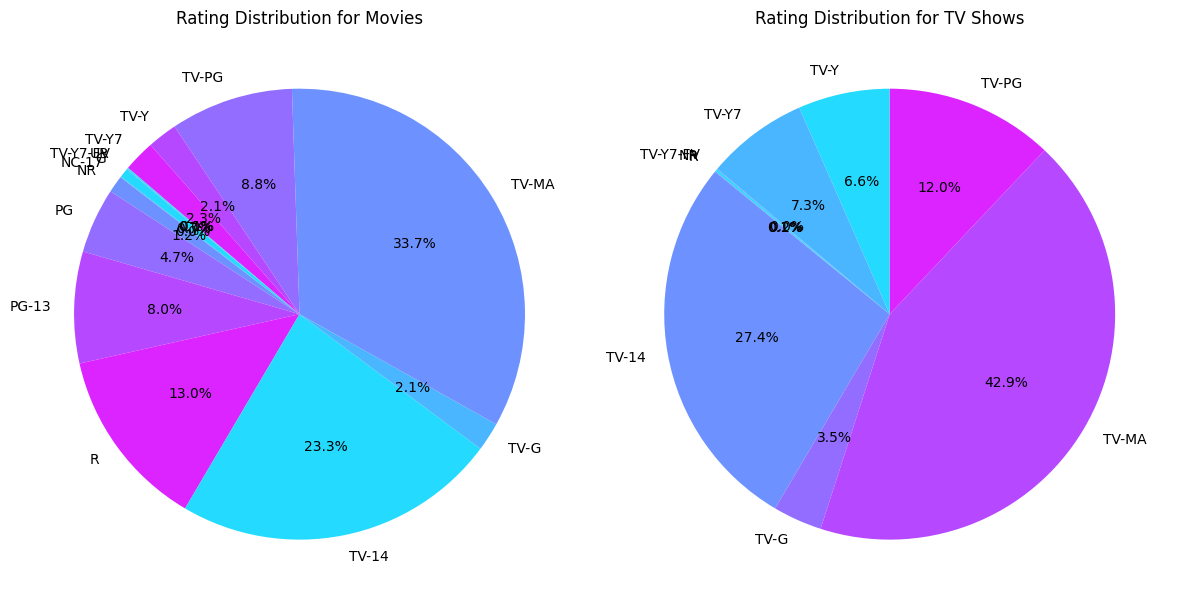

In [ ]:
# Separate the data for Movies and TV Shows
movie_ratings = rating_counts[rating_counts['type'] == 'Movie']
tv_show_ratings = rating_counts[rating_counts['type'] == 'TV Show']

# Plot Pie Chart for Movie Ratings
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.pie(movie_ratings['count'], labels=movie_ratings['rating'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("cool"))
plt.title('Rating Distribution for Movies')

# Plot Pie Chart for TV Show Ratings
plt.subplot(1, 2, 2)
plt.pie(tv_show_ratings['count'], labels=tv_show_ratings['rating'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette("cool"))
plt.title('Rating Distribution for TV Shows')

plt.tight_layout()
plt.show()


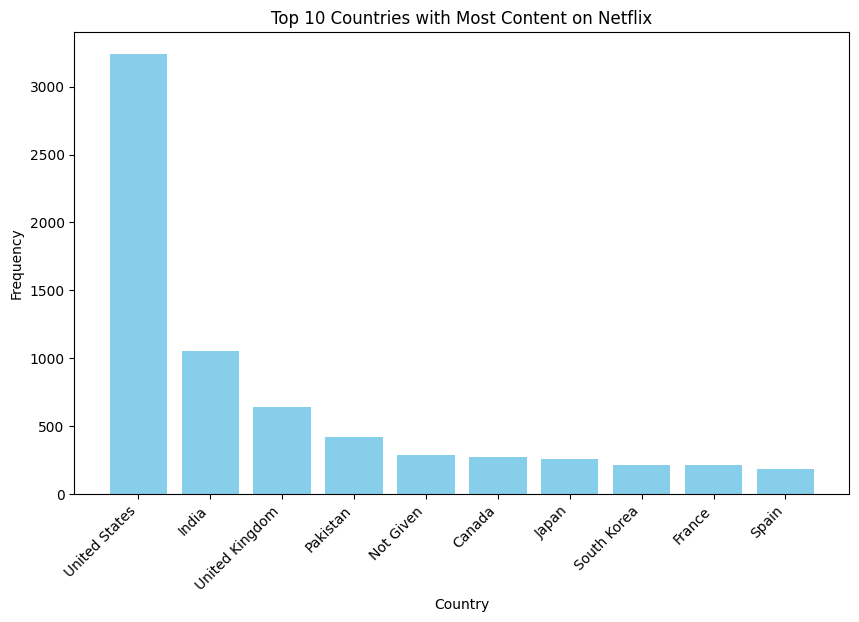

In [ ]:
#Get Top 10 Countries with the Most Content
top_ten_countries = df['country'].value_counts().head(10).reset_index()
top_ten_countries.columns = ['country', 'count']  # Rename columns for easier access

#Plot Top 10 Countries with the Most Content
plt.figure(figsize=(10, 6))
plt.bar(top_ten_countries['country'], top_ten_countries['count'], color='skyblue')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Country")
plt.ylabel("Frequency")
plt.title("Top 10 Countries with Most Content on Netflix")
plt.show()


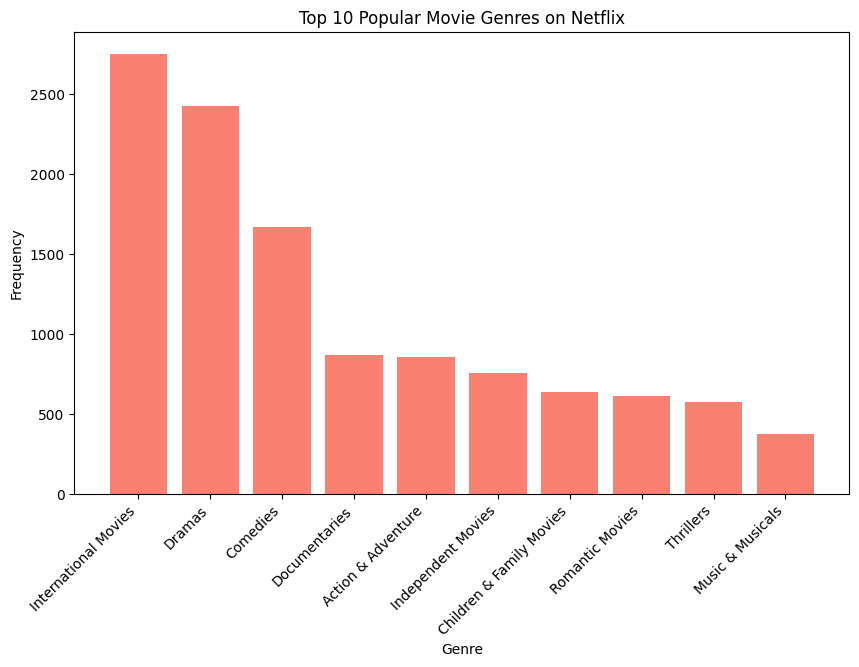

In [ ]:
#Extract Genres for Movies
#Filter for movies and split the 'listed_in' column to get individual genres
movie_genres = df[df['type'] == 'Movie']['listed_in'].str.split(', ')
all_movie_genres = sum(movie_genres.dropna().tolist(), [])  # Flatten list of genres

# Count occurrences of each genre and select the top 10
top_ten_movie_genres = pd.Series(all_movie_genres).value_counts().head(10).reset_index()
top_ten_movie_genres.columns = ['genre', 'count']  # Rename columns for easier access

# Step 2: Plot Top 10 Popular Movie Genres
plt.figure(figsize=(10, 6))
plt.bar(top_ten_movie_genres['genre'], top_ten_movie_genres['count'], color='salmon')
plt.xticks(rotation=45, ha='right')
plt.xlabel("Genre")
plt.ylabel("Frequency")
plt.title("Top 10 Popular Movie Genres on Netflix")
plt.show()

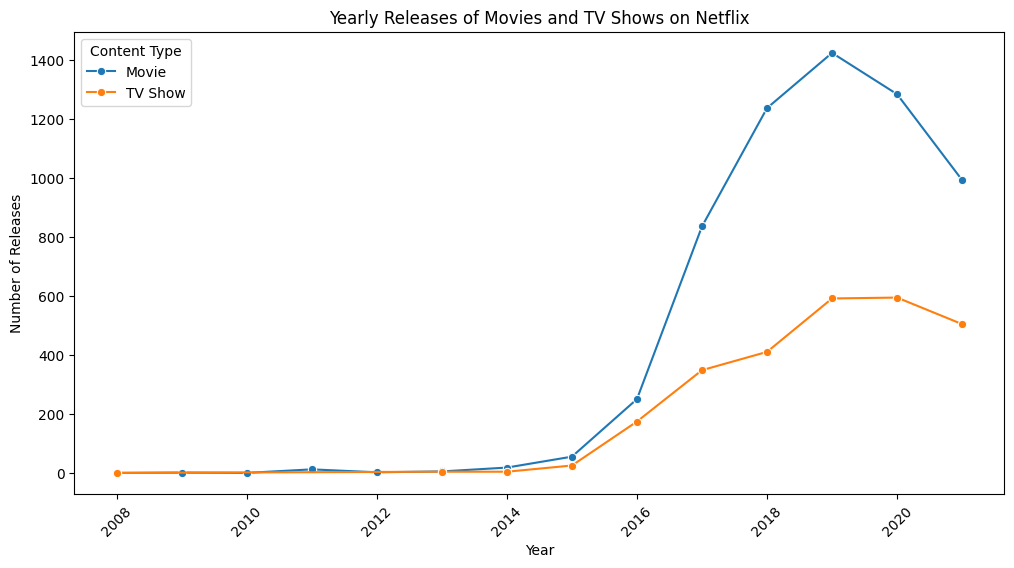

In [ ]:
#yearly releases of movie and tv shows on netflix
#Extract Year from 'date_added' Column
# Ensure the 'date_added' column is in datetime format
df['date_added'] = pd.to_datetime(df['date_added'], errors='coerce')

# Create a new column for the release year
df['year_added'] = df['date_added'].dt.year

# Filter and Count Yearly Releases by Type (Movies and TV Shows)
yearly_releases = df.groupby(['year_added', 'type']).size().reset_index(name='count')

# Plot Yearly Releases of Movies and TV Shows
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_releases, x='year_added', y='count', hue='type', marker='o')
plt.title('Yearly Releases of Movies and TV Shows on Netflix')
plt.xlabel('Year')
plt.ylabel('Number of Releases')
plt.xticks(rotation=45)
plt.legend(title='Content Type')
plt.show()
